### Analyze info from RSEs based on `dcm_rucio_rses.py`

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

In [3]:
df = pd.read_json('RSEs_dune.json')

In [4]:
df

,name,type,account_lim,account_free,rse_usage,nfiles,date,dunepro,decommissioned
0,CERN_PDUNE_CASTOR,TAPE,inf,inf,5.688006e+06,1243951,"""2023-11-22""",True,False
1,CERN_PDUNE_EOS,DISK,2.000000e+06,3.951639e+05,1.503574e+06,437589,"""2023-07-21""",True,False
2,DUNE_CERN_EOS,DISK,1.000000e+06,7.373693e+05,4.536744e+05,458688,"""2024-01-17""",True,False
3,DUNE_ES_PIC,DISK,1.000000e+06,8.085014e+05,1.924108e+05,181449,"""2024-01-17""",True,False
4,DUNE_FR_CCIN2P3,DISK,1.000000e+06,1.000000e+06,1.030513e+04,48788,"""2023-04-20""",True,True
5,DUNE_FR_CCIN2P3_DISK,DISK,5.000000e+05,3.225298e+05,1.797863e+05,232489,"""2024-01-17""",True,False
6,DUNE_FR_CCIN2P3_TAPE,TAPE,5.000000e+05,4.914749e+05,8.525075e+03,12486,"""2023-04-20""",True,False
7,DUNE_FR_CCIN2P3_XROOTD,DISK,1.000000e+04,1.000000e+04,9.877950e+03,13910,"""2023-03-01""",True,True
8,DUNE_IN_TIFR,DISK,1.000000e+02,9.795467e+01,2.990054e+02,1393,"""2024-01-16""",True,False
9,DUNE_IT_INFN_CNAF,DISK,3.000000e+05,3.000000e+05,9.600000e-08,4,"""2023-12-28""",True,False


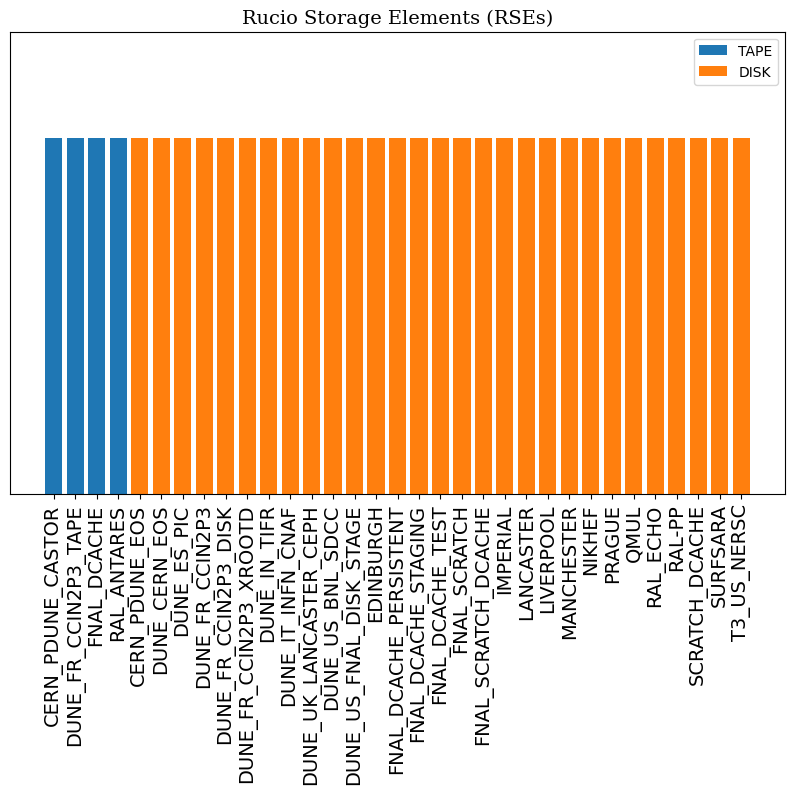

In [5]:
plt.figure(figsize=(10, 6))
for rse_type in df['type'].unique():
    subset = df[df['type'] == rse_type]
    plt.bar(subset['name'], 1, label=rse_type)

plt.ylim(0,1.3)
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = True, bottom = True) 
plt.title('Rucio Storage Elements (RSEs)', fontdict=font)
plt.xticks(rotation=90)
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('rse_fig1.png', bbox_inches='tight')
plt.show()

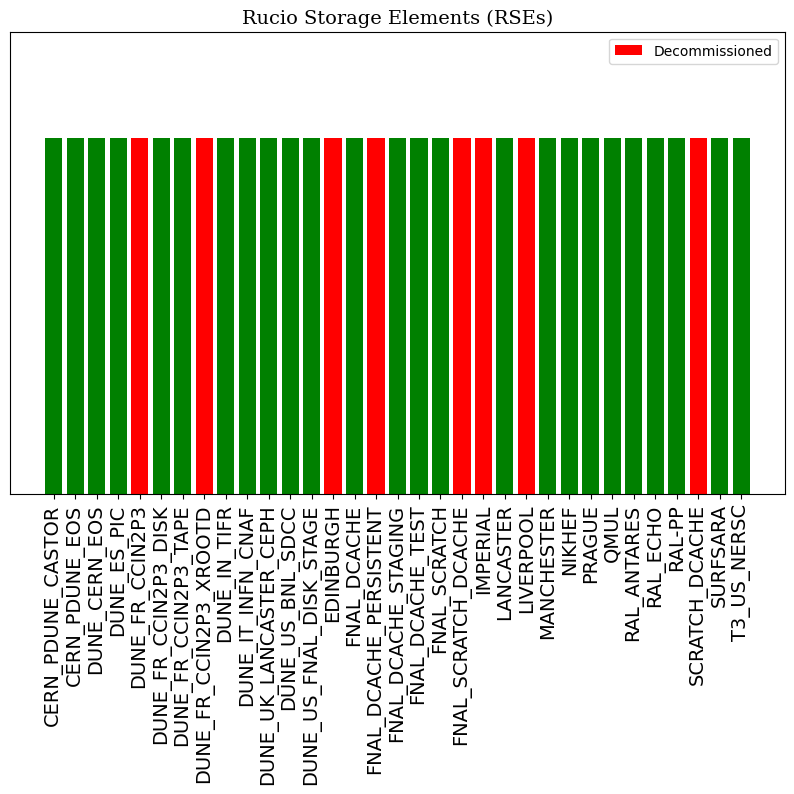

In [6]:
plt.figure(figsize=(10, 6))

decommissioned_subset = df[df['decommissioned'] == True]
plt.bar(df['name'],1,color='green')
plt.bar(decommissioned_subset['name'], 1, color='red', label='Decommissioned')

plt.ylim(0,1.3)
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = True, bottom = True) 

plt.title('Rucio Storage Elements (RSEs)', fontdict=font)
plt.xticks(rotation=90)
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('rse_fig2.png', bbox_inches='tight')
plt.show()

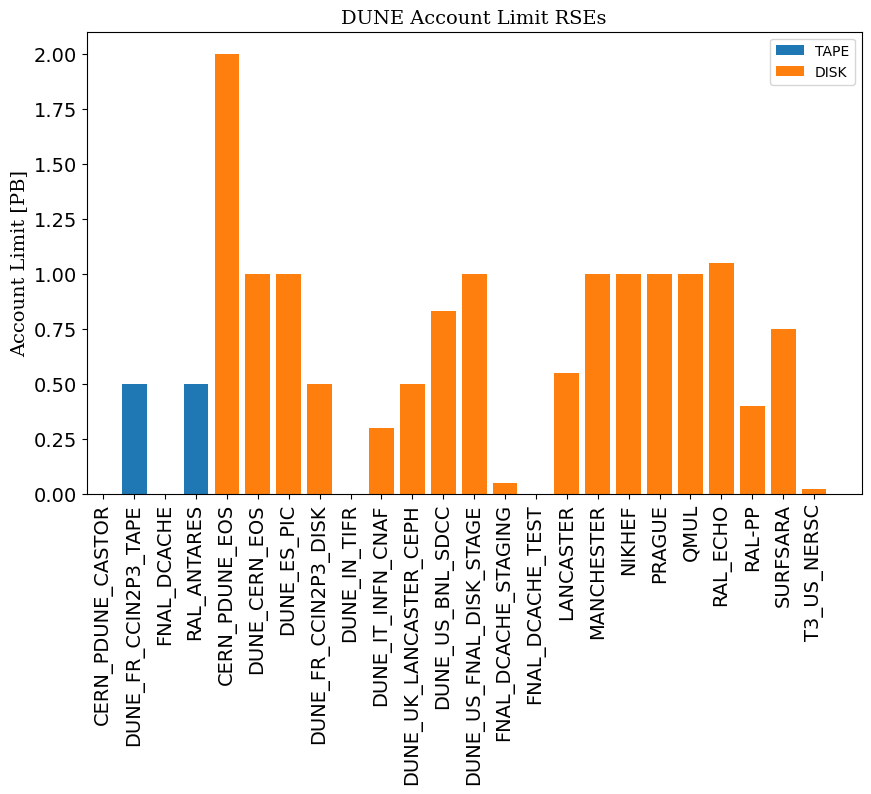

In [7]:
# Group the data by site and plot usage 
current_RSEs = df[(df['decommissioned'] == False) & (df['dunepro'] == True)]

plt.figure(figsize=(10, 6))
for rse_type in current_RSEs['type'].unique():
    subset = current_RSEs[current_RSEs['type'] == rse_type]
    plt.bar(subset['name'], subset['account_lim']/1e6, label=rse_type)

#plt.xlabel('RSE Name')
plt.ylabel('Account Limit [PB]', fontdict=font)
plt.title('DUNE Account Limit RSEs', fontdict=font)
plt.xticks(rotation=90)
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('rse_fig3.png', bbox_inches='tight')
plt.show()

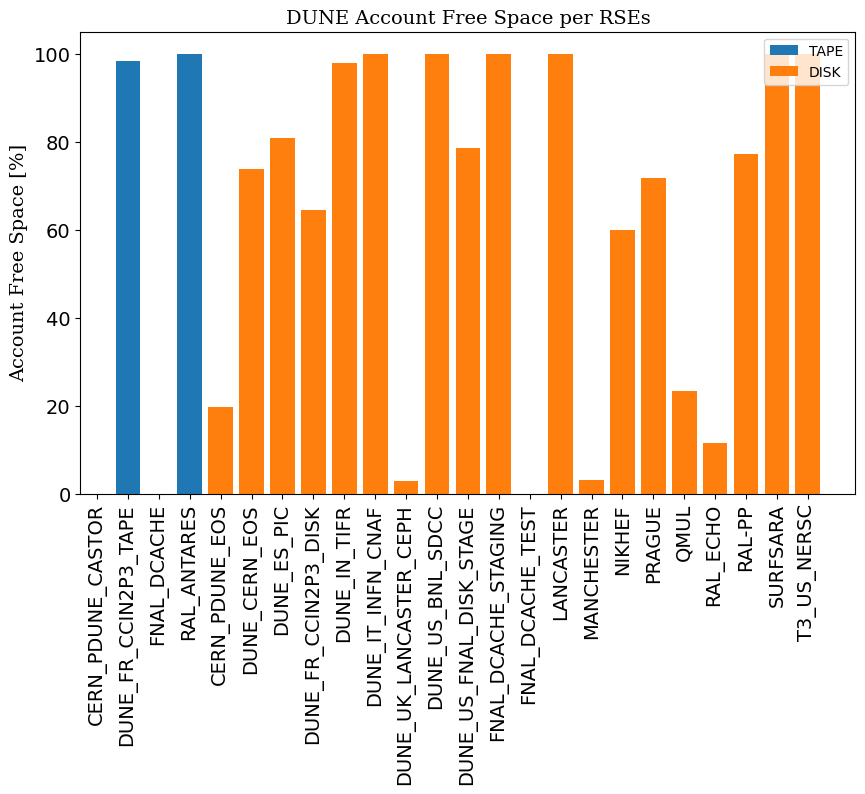

In [8]:
# Group the data by site and plot usage 
#current_RSEs = df[(df['decommissioned'] == False) & (df['dunepro'] == True)]

plt.figure(figsize=(10, 6))
for rse_type in current_RSEs['type'].unique():
    subset = current_RSEs[current_RSEs['type'] == rse_type]
    plt.bar(subset['name'], (subset['account_free']/subset['account_lim'])*100., label=rse_type)

#plt.xlabel('RSE Name')
plt.ylabel('Account Free Space [%]', fontdict=font)
plt.title('DUNE Account Free Space per RSEs', fontdict=font)
plt.xticks(rotation=90)
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('rse_fig4.png', bbox_inches='tight')
plt.show()

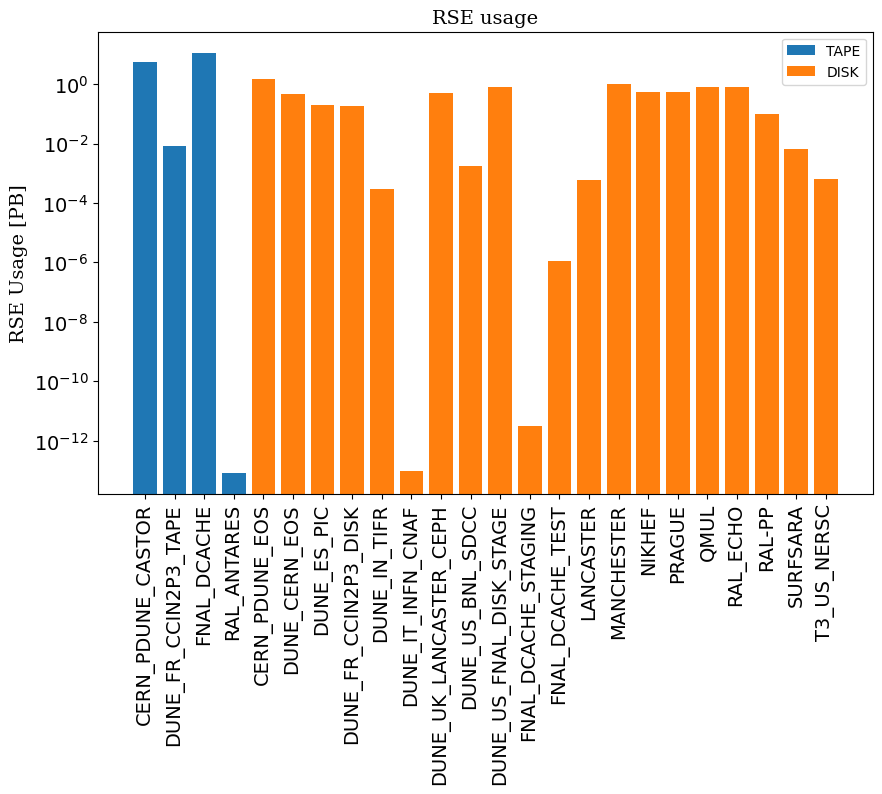

In [9]:
# Group the data by site and plot number of files  
#current_RSEs = df[(df['decommissioned'] == False)]

plt.figure(figsize=(10, 6))
for rse_type in current_RSEs['type'].unique():
    subset = current_RSEs[current_RSEs['type'] == rse_type]
    plt.bar(subset['name'], subset['rse_usage']/1.0e6, label=rse_type)

#plt.xlabel('RSE Name')
plt.ylabel('RSE Usage [PB]', fontdict=font)
plt.yscale('log')
plt.title('RSE usage', fontdict=font)
plt.xticks(rotation=90)
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('rse_fig5.png', bbox_inches='tight')
plt.show()

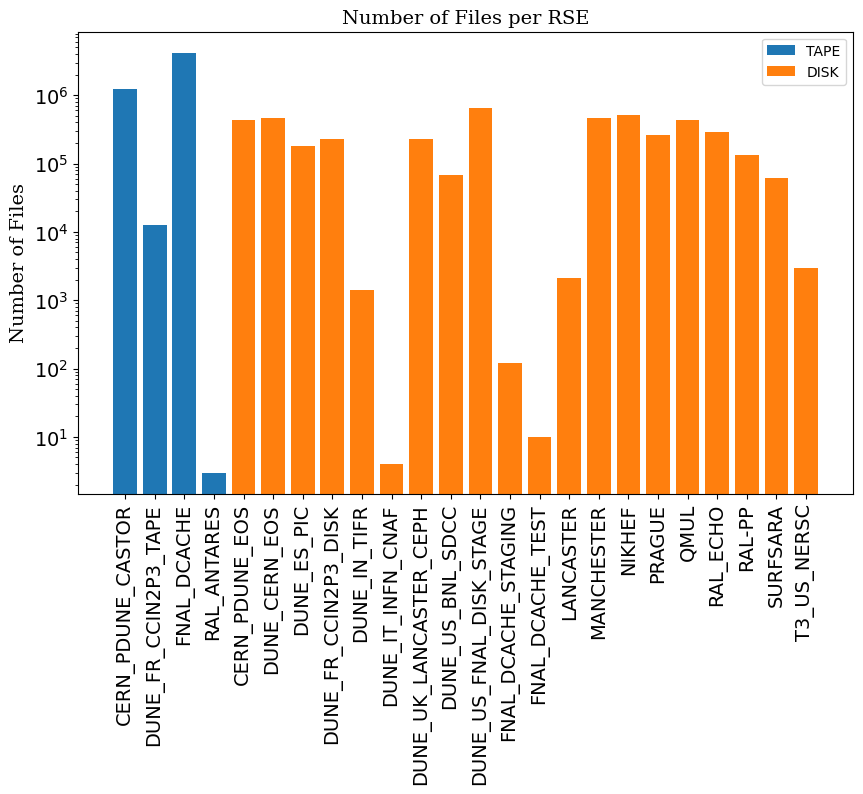

In [10]:
plt.figure(figsize=(10, 6))
for rse_type in current_RSEs['type'].unique():
    subset = current_RSEs[current_RSEs['type'] == rse_type]
    plt.bar(subset['name'], subset['nfiles'], label=rse_type)

#plt.xlabel('RSE Name')
plt.ylabel('Number of Files', fontdict=font)
plt.yscale('log')
plt.title('Number of Files per RSE', fontdict=font)
plt.xticks(rotation=90)
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('rse_fig6.png', bbox_inches='tight')
plt.show()

/var/folders/s8/l89dbm6s72x1b7stbxlj2f6c0000gn/T/ipykernel_82897/3369976672.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_RSEs['date'] = pd.to_datetime(current_RSEs['date'].str.strip('"'), format='%Y-%m-%d')


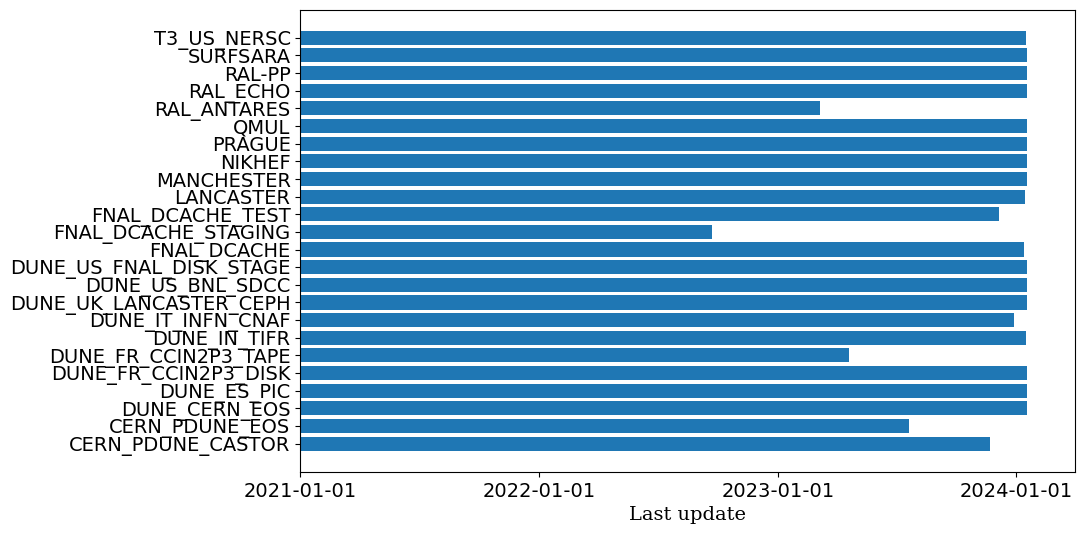

In [11]:
# Group the data by site and plot last time was updated

fig, ax = plt.subplots(figsize=(10, 6))
current_RSEs['date'] = pd.to_datetime(current_RSEs['date'].str.strip('"'), format='%Y-%m-%d')
ax.barh(current_RSEs['name'], current_RSEs['date'])
start_date = datetime(2021, 1, 1)
end_date = datetime(2024, 3, 31)
ax.set_xlim([start_date, end_date])
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_xlabel('Last update', fontdict=font)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('rse_fig7.png', bbox_inches='tight')
plt.show()
